In [5]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from keras.layers import Dense
import os
from mlp_helper import plot_boundaries_keras, get_dataset, plot_boundaries, draw_neural_net, return_weights_notation, get_dataset_2
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 

# Pruebas a realizar:
- hidden_units en 2 y 3
- Cambiar funcion de activación de la capa oculta: Sigmoid, Relu, Linear

# Dataset

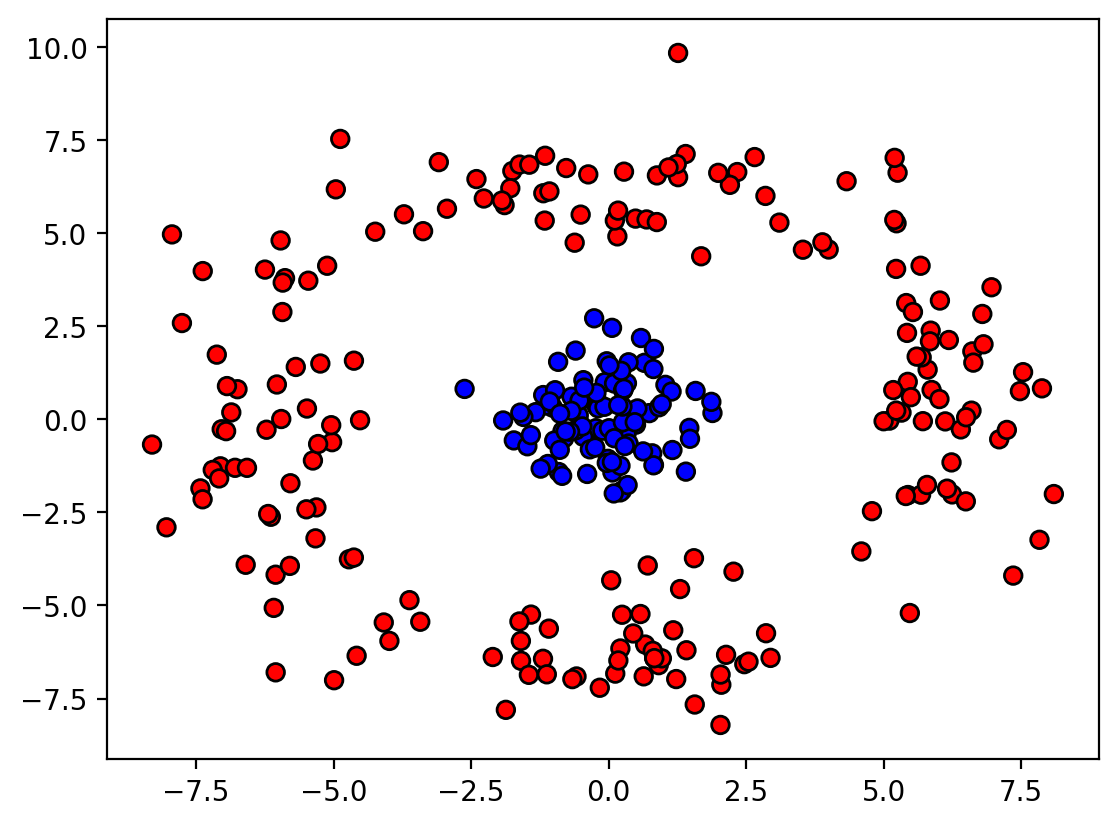

In [37]:
X, y = get_dataset()
X, y = get_dataset_2()
plot_boundaries(X, y)

# Modelo: Red neuronal con 1 capa oculta

In [31]:
input_dim = 2
shape = [input_dim, 10, 1]

### Selección de función de activación
https://medium.com/@himanshuxd/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e

In [32]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [33]:
def plot_act(activ):
    t = np.linspace(-10, 10, 100)
    plt.plot(t, activ(t))
    plt.show()

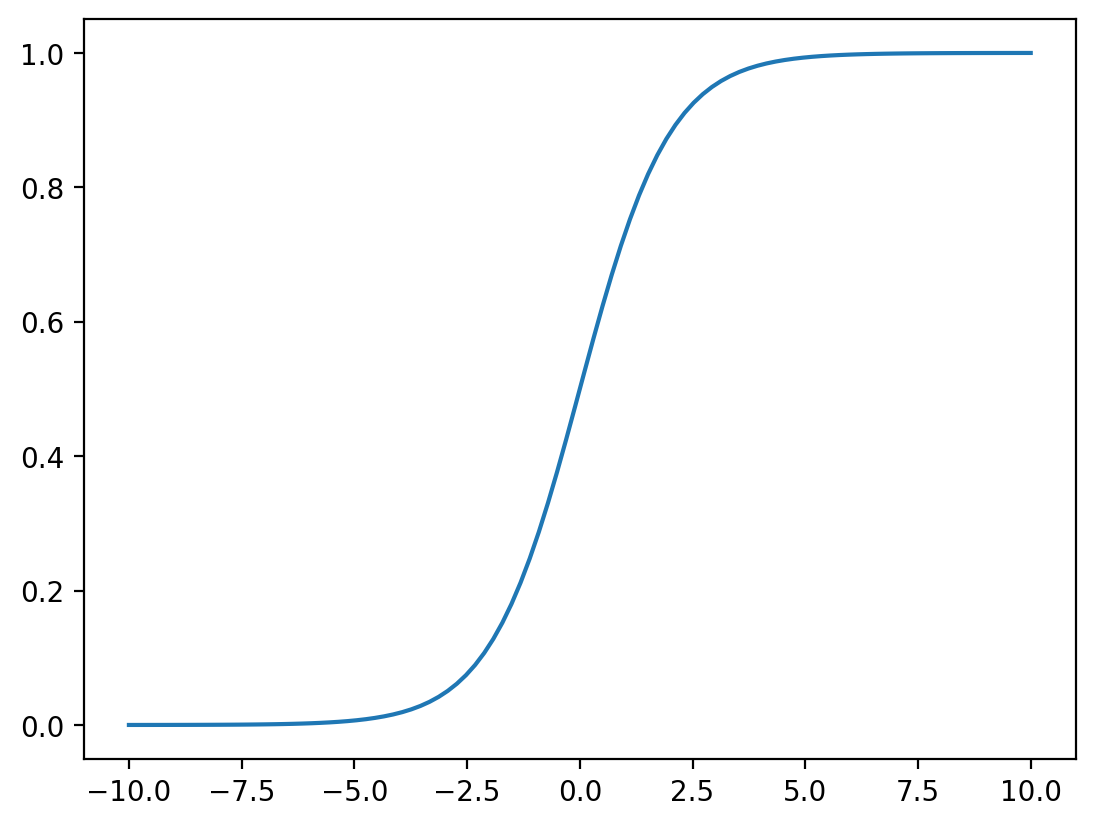

In [34]:
plot_act(sigmoid)

In [35]:
activation = 'relu' # linear, tanh, relu, tanh, sigmoid

In [38]:
hidden_units = 10
model = Sequential()
model.add(Dense(hidden_units, input_shape=(input_dim,), activation=activation))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
model.evaluate(X, y)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6533 - loss: 0.4986 


[0.4986449182033539, 0.653333306312561]

In [42]:
weights = model.get_weights()
print(weights)

[array([[-2.3840964e-02,  5.0824815e-01,  1.4597559e-01,  4.4479710e-01,
        -1.9926012e-02,  2.1260792e-01,  1.0012913e-01,  3.3801430e-01,
         6.3883275e-01, -6.9369549e-01],
       [-2.7194831e-01, -5.5203569e-01, -2.8703639e-01, -5.6423151e-01,
        -6.0729796e-01,  3.4385997e-01,  1.4624399e-01, -4.6229362e-04,
        -3.0996799e-01,  5.1624304e-01]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([[ 0.68277663],
       [-0.6140954 ],
       [ 0.23036319],
       [-0.17252463],
       [ 0.08303457],
       [-0.54818016],
       [ 0.5649708 ],
       [ 0.22800106],
       [-0.35223484],
       [-0.12302321]], dtype=float32), array([0.], dtype=float32)]


In [43]:
weights[0].shape, X[0:1].shape

((2, 10), (1, 2))

In [44]:
i = 1
sigmoid(np.dot(sigmoid(
    np.dot(X[i:i+1], weights[0]) + weights[1]), weights[2]) + weights[3])

array([[0.48515492]])

In [45]:
model.predict(X[i:i+1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.45219812]], dtype=float32)

## Para recordar:

- Una red neuronal es la concatenación de capas
- Cada capa hace el producto entre el vector fila de entrada con la matriz de pesos, le suma el bias y luego aplica función de activación

# Entrenamiento

In [46]:
model.fit(X, y, epochs=500, verbose=0)

In [47]:
model.predict_proba = model.predict

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 2.2293e-05
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step


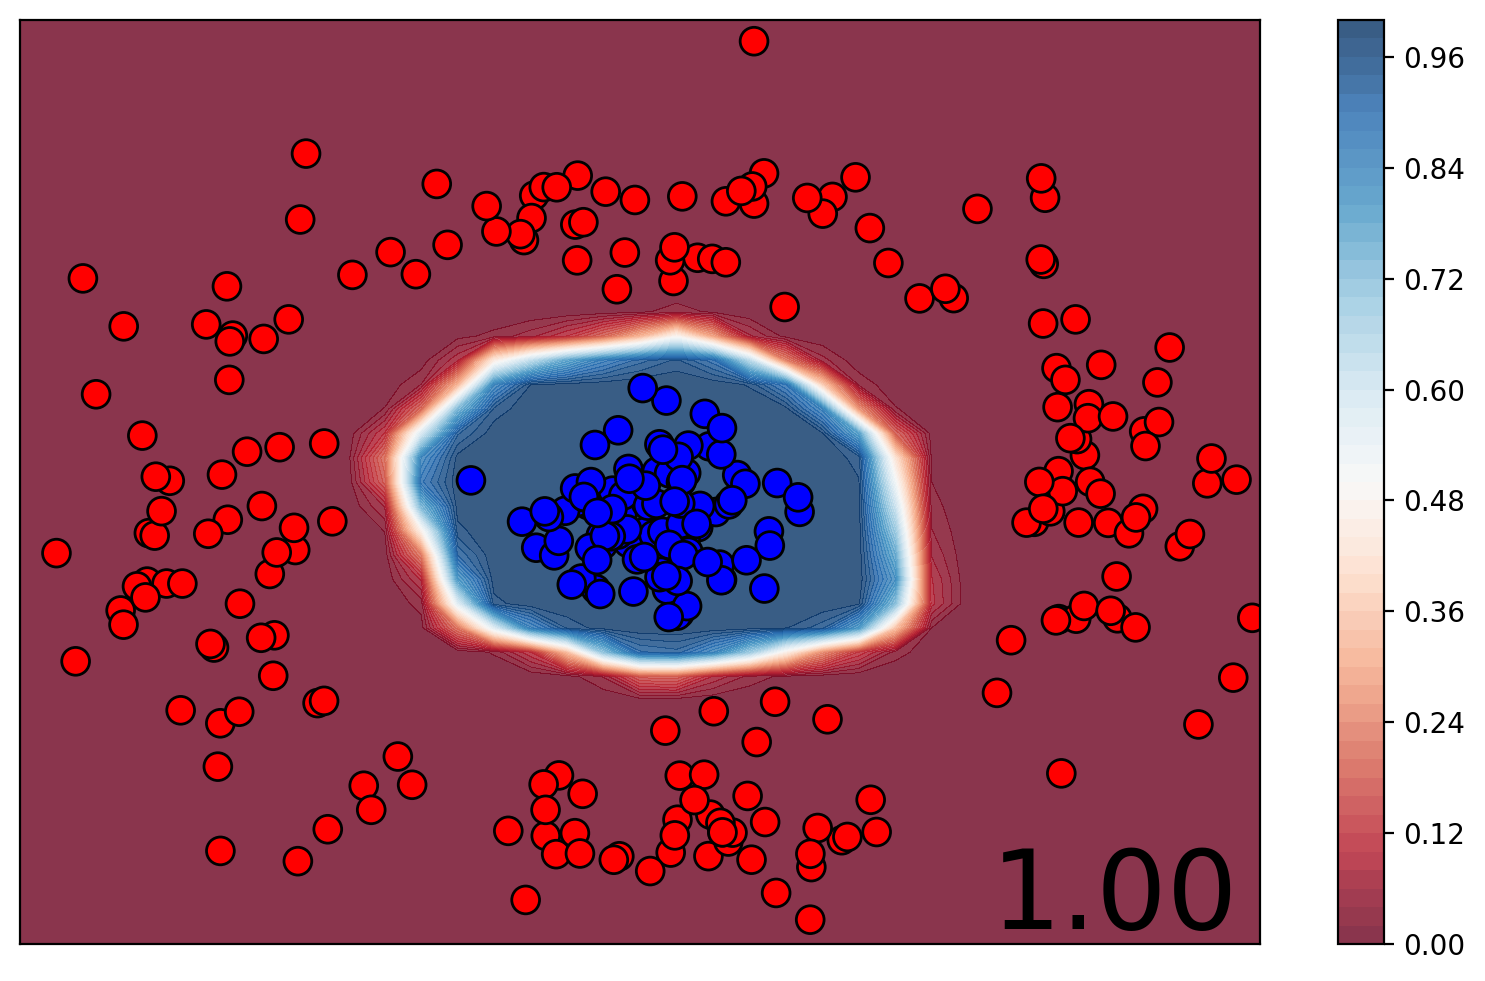

In [48]:
plt.figure(figsize=(10,6))
plot_boundaries_keras(X, y, model.evaluate(X,y)[1], probability_func=model.predict_proba, h=0.5)

In [21]:
model.predict_proba(X).shape

(300, 1)

## Obtenemos pesos de primera capa
### Pesos aprendidos

In [49]:
model.get_weights()

[array([[ 0.18340684,  1.0447907 ,  0.39283627, -0.7952753 , -1.3009689 ,
          1.4389981 ,  0.26006594,  0.35330835,  2.4049408 , -1.678551  ],
        [-0.12425048, -1.6606299 , -0.20783034, -2.2228997 , -1.8952774 ,
          1.41788   , -0.1265028 , -0.1970952 , -0.16617747,  1.6087414 ]],
       dtype=float32),
 array([ 1.5334932 , -0.73686343,  2.7520497 , -0.687282  , -1.4926487 ,
        -1.2980888 ,  1.6833783 ,  2.42546   , -0.2895896 , -1.4581685 ],
       dtype=float32),
 array([[ 2.0044763 ],
        [-2.283148  ],
        [ 2.4560268 ],
        [-1.7260054 ],
        [-0.98783773],
        [-2.3528259 ],
        [ 2.3801963 ],
        [ 2.401321  ],
        [-2.0487587 ],
        [-1.1904838 ]], dtype=float32),
 array([0.90461177], dtype=float32)]

In [50]:
# Nos quedamos con los pesos de la primer capa
layer_1_w = model.get_weights()[0]
layer_1_b = model.get_weights()[1]
print(layer_1_w)
print(layer_1_b)

[[ 0.18340684  1.0447907   0.39283627 -0.7952753  -1.3009689   1.4389981
   0.26006594  0.35330835  2.4049408  -1.678551  ]
 [-0.12425048 -1.6606299  -0.20783034 -2.2228997  -1.8952774   1.41788
  -0.1265028  -0.1970952  -0.16617747  1.6087414 ]]
[ 1.5334932  -0.73686343  2.7520497  -0.687282   -1.4926487  -1.2980888
  1.6833783   2.42546    -0.2895896  -1.4581685 ]


In [51]:
# Preparo los pesos a asignar a un "submodelo" de "regresión logistica"
model_1_weights = [np.array([layer_1_w[:,0]]).T, np.array([layer_1_b[0]])]
print(model_1_weights)

[array([[ 0.18340684],
       [-0.12425048]], dtype=float32), array([1.5334932], dtype=float32)]


In [52]:
# Construimos el submodelo
model_1 = Sequential()
model_1.add(Dense(1, input_shape=(2,), activation=activation))
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Le asginamos los pesos al submodelo
model_1.set_weights(model_1_weights)
model_1.compile(Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
model_1.predict_proba = model_1.predict

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4933 - loss: 6.5791    
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step


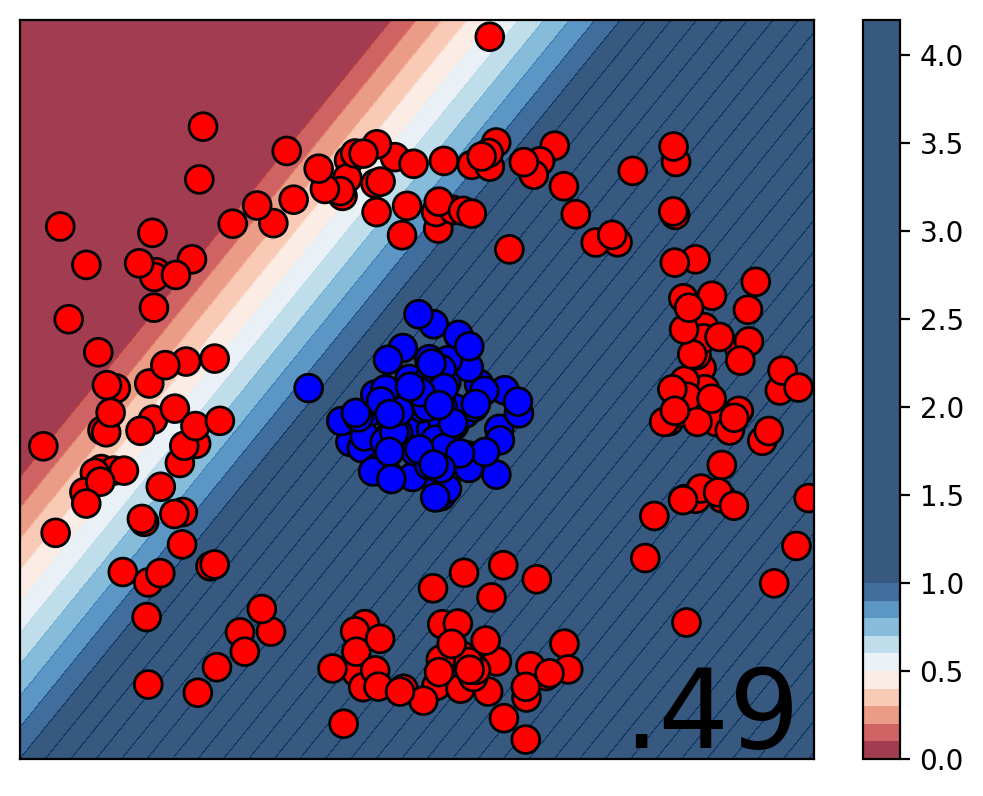

In [57]:
plot_boundaries_keras(X, y, model_1.evaluate(X,y)[1], probability_func=model_1.predict_proba, h=0.5)

### Generalizo función para armar submodelo
Y grafico los dos submodelos

In [61]:
def get_sub_model(model, index, idx1=0, idx2=1, activation='sigmoid', input_dim=2):
    layer_1_w = model.get_weights()[idx1]
    layer_1_b = model.get_weights()[idx2]
    sub_model_weights = [np.array([layer_1_w[:,index]]).T, np.array([layer_1_b[index]])]
    sub_model = Sequential()
    sub_model.add(Dense(1, input_shape=(input_dim,), activation=activation))
    sub_model.set_weights(sub_model_weights)
    sub_model.compile(Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    sub_model.predict_proba = sub_model.predict
    return sub_model

### Graficamos las rectas aprendidas por los submodelos

In [65]:
rows = hidden_units // 2
cols = hidden_units // rows + hidden_units % rows
rows, cols

(5, 2)

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 174us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4933 - loss: 6.5791     
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 192us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4167 - loss: 8.8215  
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 170us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4600 - loss: 7.7338     
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 179us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4733 - loss: 7.9267 
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 175us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4267 - loss: 8.7080  
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 165us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4000 - loss: 9.1974  
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step
2813/2813 ━━━━━━━━━━━━━━━━━━━

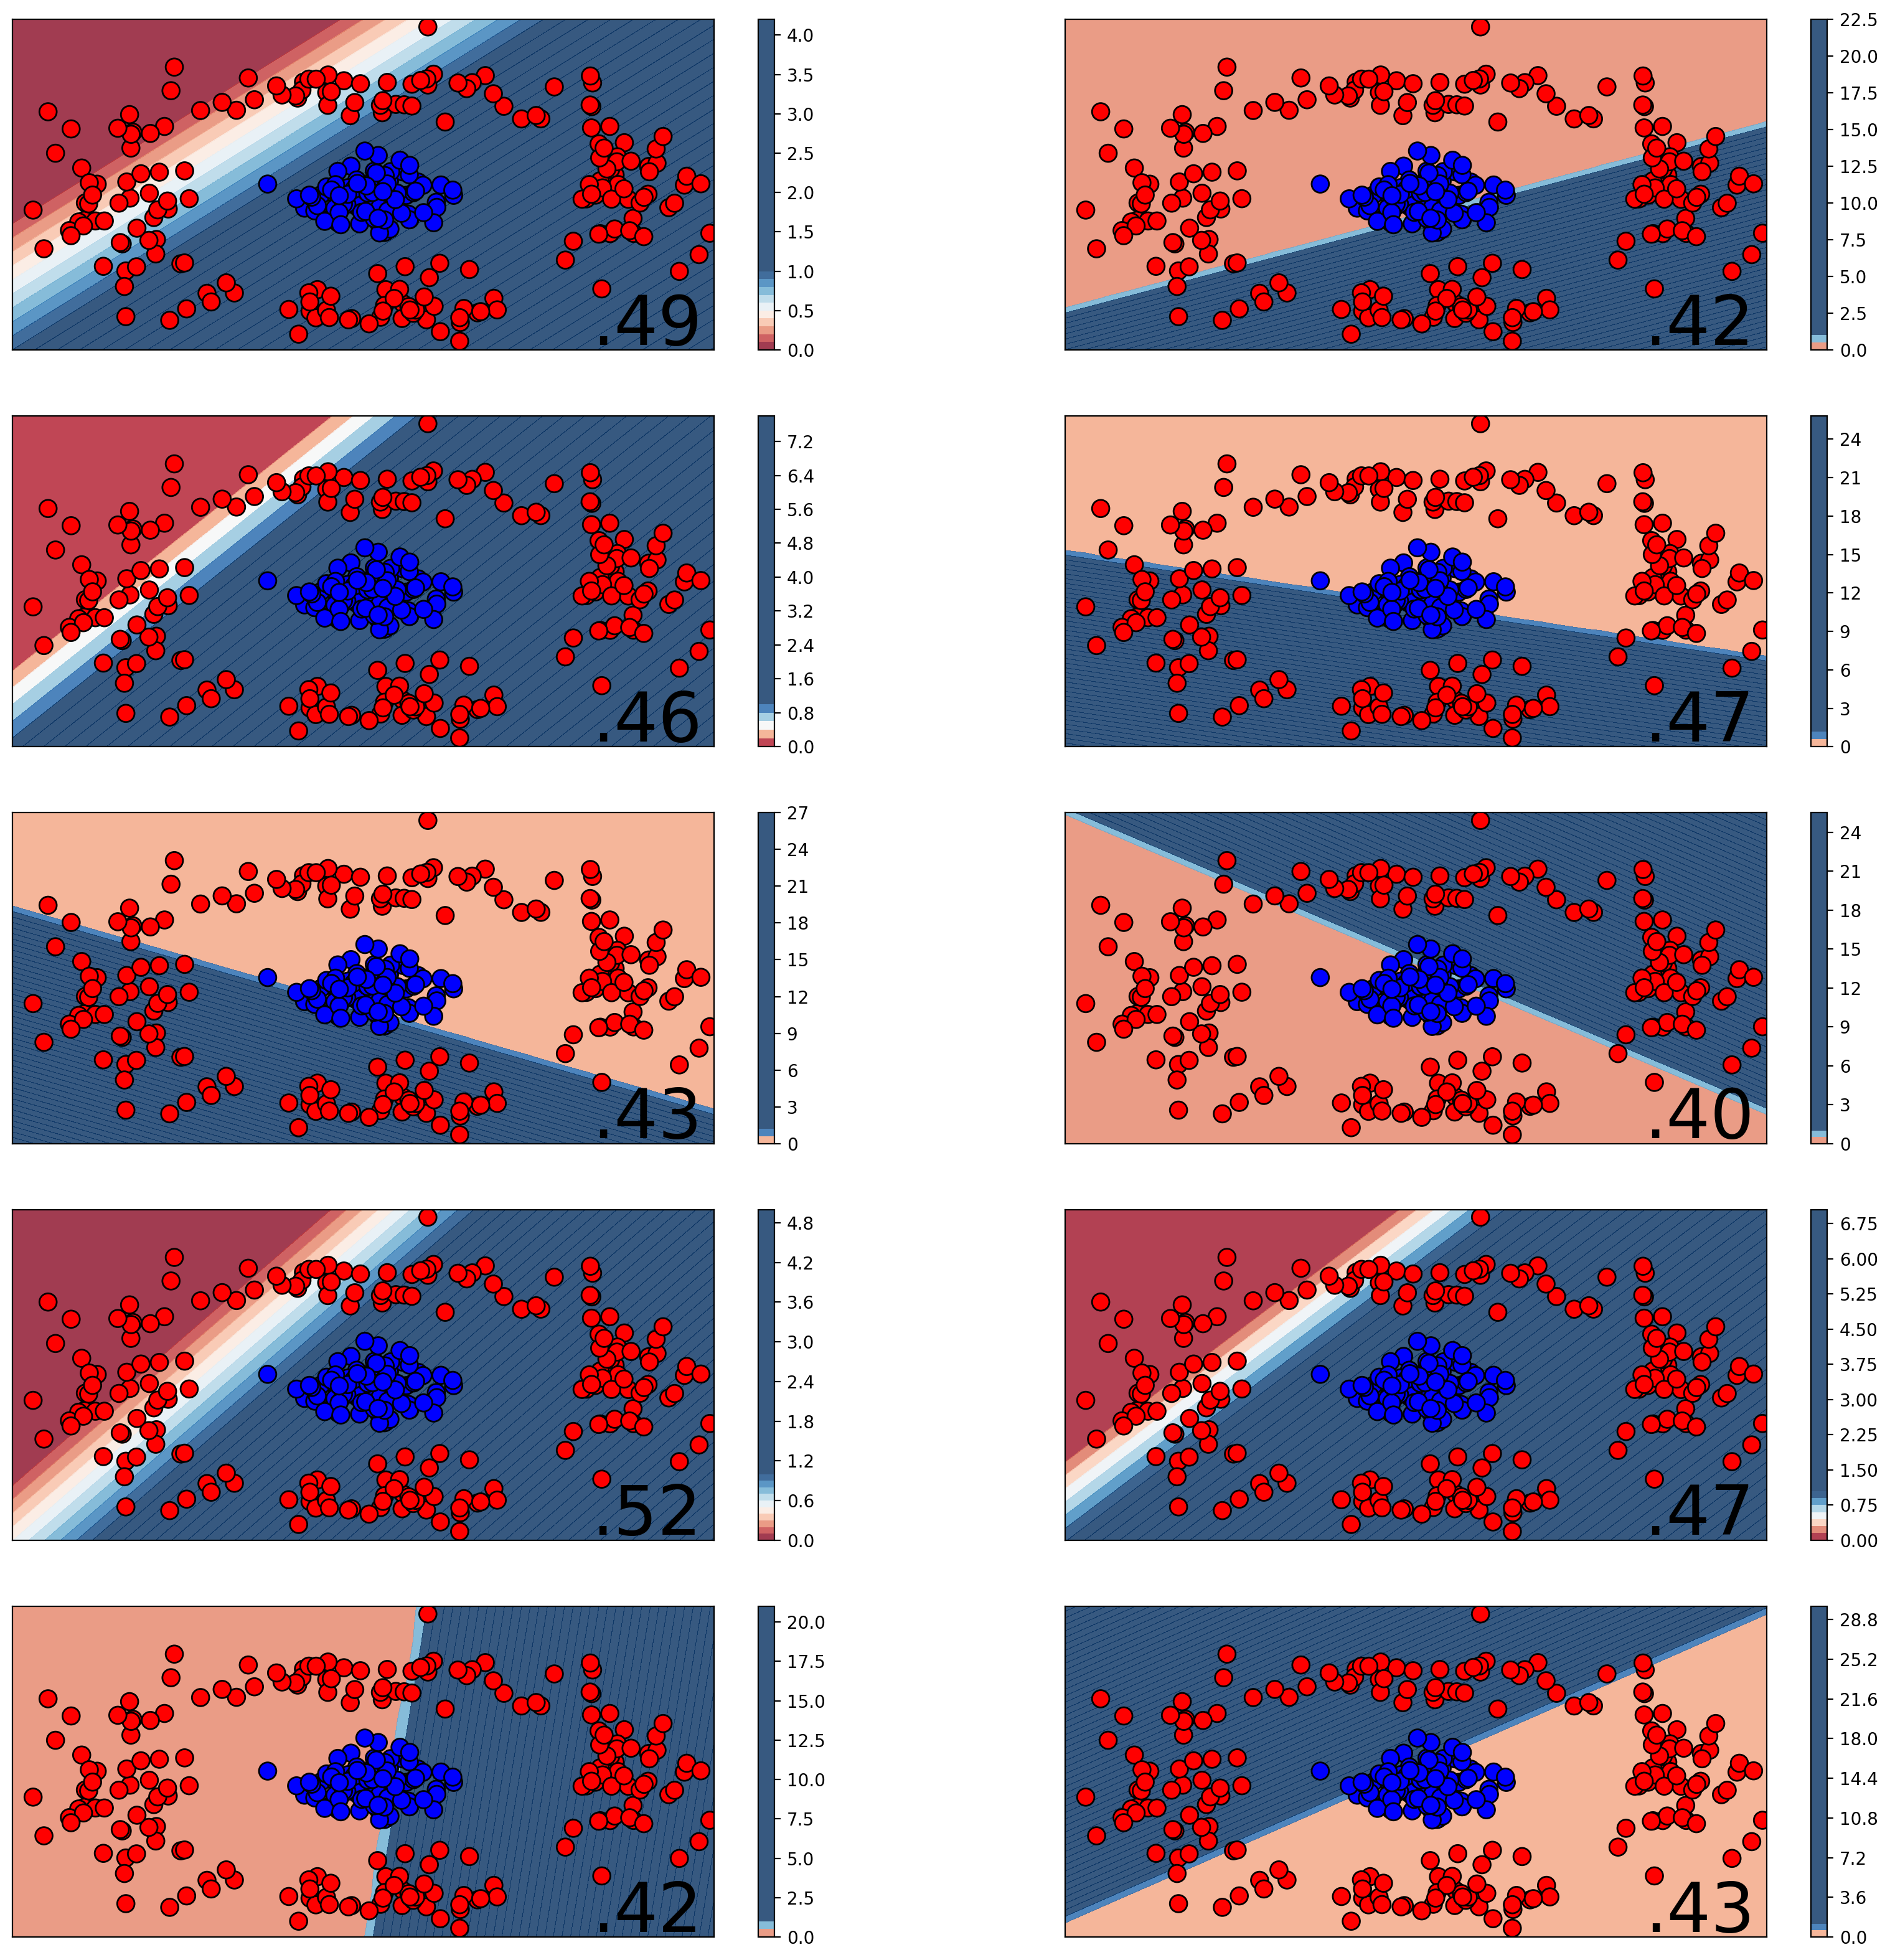

In [67]:
f, ax = plt.subplots(rows, cols, figsize=(20,20))
sub_models = []
ax = ax.flatten()
# Para el mesh-grid
N = 300
X1 = np.linspace(X[:, 0].min(), X[:, 0].max(), N)
X2 = np.linspace(X[:, 1].min(), X[:, 1].max(), N)

X1, X2 = np.meshgrid(X1, X2)
Z_lr_array = []

for i in range(hidden_units):
    sub_model = get_sub_model(model, i, activation=activation)
    
    sub_models.append(sub_model)
    Z_lr = sub_model.predict_proba(np.c_[X1.ravel(), X2.ravel()])[:, 0]
    Z_lr = Z_lr.reshape(X1.shape)
    Z_lr_array.append(Z_lr)
    plot_boundaries_keras(X, y, sub_model.evaluate(X,y)[1], probability_func=sub_model.predict_proba, ax=ax[i], h=0.5)

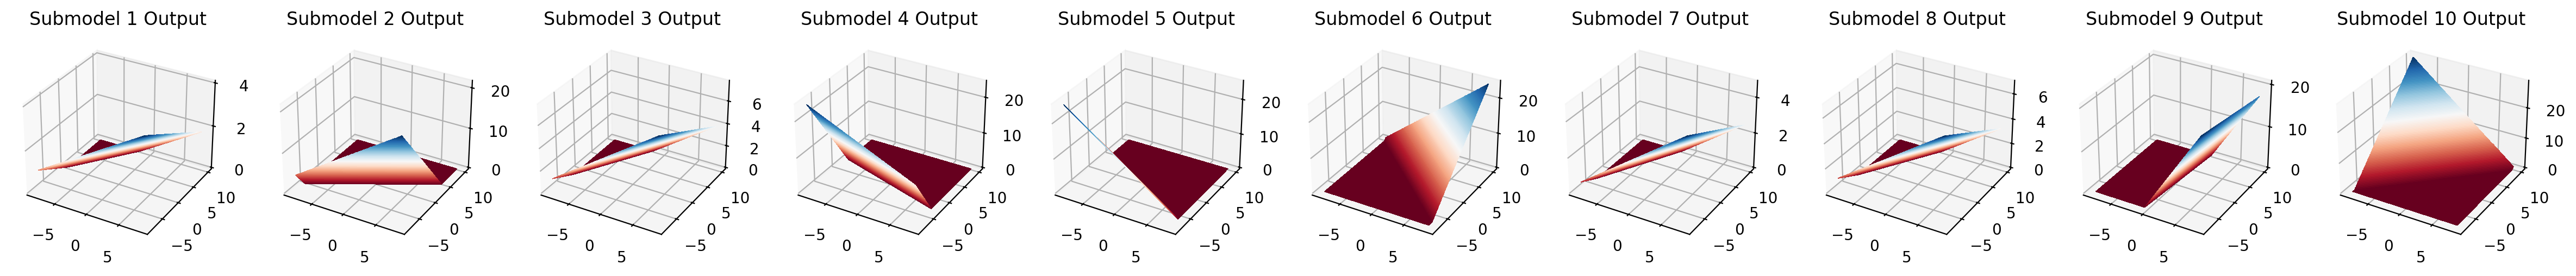

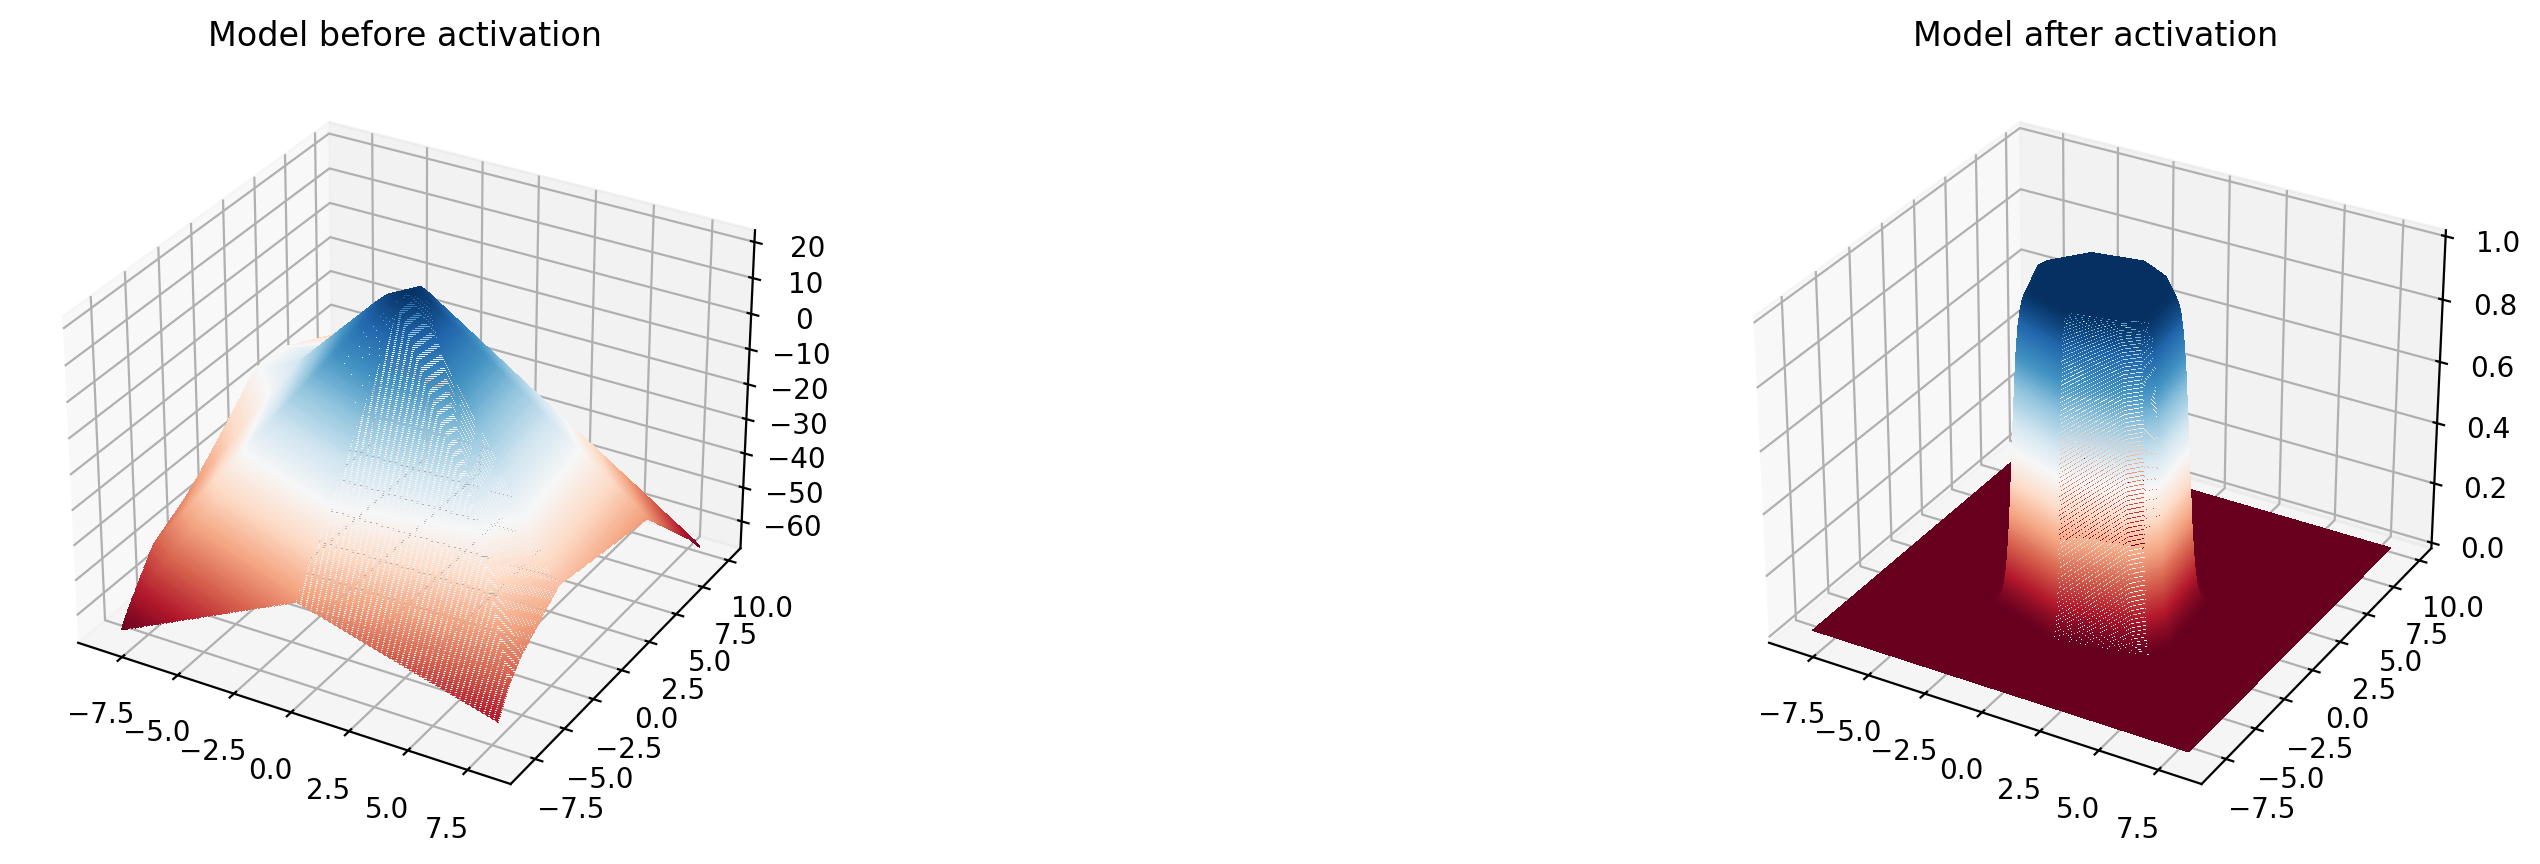

In [68]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(30,5))
Z_lr_sum = 0
for i in range(hidden_units):
    ax = fig.add_subplot(1, hidden_units, i+1, projection='3d')
    ax.contourf(X1, X2, Z_lr_array[i], 256, cmap=plt.cm.RdBu) #, cmap=cm_blues)
    ax.set_title(f'Submodel {i+1} Output')
    Z_lr_sum = Z_lr_sum + Z_lr_array[i]  * model.get_weights()[2][i][0] 
plt.show()
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.contourf(X1, X2, Z_lr_sum + model.get_weights()[3][0], 256, cmap=plt.cm.RdBu) #, cmap=cm_blues)
ax.set_title(f'Model before activation')
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.contourf(X1, X2, sigmoid(Z_lr_sum + model.get_weights()[3][0]), 256, cmap=plt.cm.RdBu)
ax.set_title(f'Model after activation')
plt.show()

In [279]:
# Notar que en los gráficos se ve que parece estar al reves.
model.get_weights()[2]

array([[6.054812 ],
       [6.0393834],
       [6.0406017]], dtype=float32)

In [280]:
model.get_weights()[3]

array([-11.75357], dtype=float32)

In [281]:
# Por eso los pesos del siguiente submodelo (el que combina los dos) son negativos

# Espacio linealmente separable

In [315]:
X_sub_preds = []
for i in range(hidden_units):
    X_sub_preds.append(sub_models[i].predict(X))

In [316]:
# Calculamos la ubicación de las observaciones en el nuevo espacio
new_space = np.hstack(X_sub_preds)

In [317]:
new_space.shape

(300, 10)

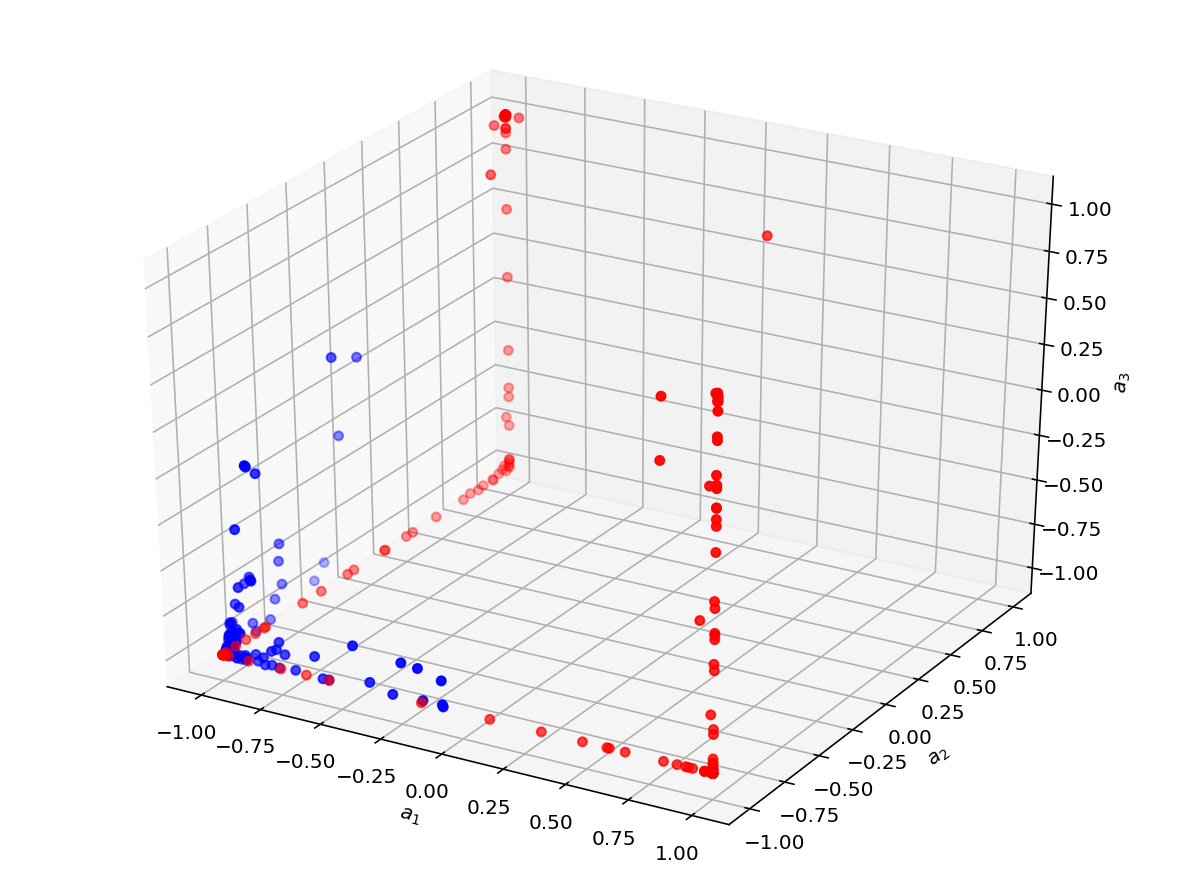

In [318]:
# Graficamos los puntos en el nuevo espacio

if hidden_units == 2:
    plt.scatter(new_space[y==1,0], new_space[y==1,1])
    plt.scatter(new_space[y==0,0], new_space[y==0,1])
    plt.show()
else:
    fig = plt.figure(figsize=(8,6))
    ax = Axes3D(fig)
    ax.scatter(new_space[y==0,0], new_space[y==0,1], new_space[y==0,2], c='r')
    ax.scatter(new_space[y==1,0], new_space[y==1,1], new_space[y==1,2], c='b')
    ax.set_xlabel('$a_1$')
    ax.set_ylabel('$a_2$')
    ax.set_zlabel('$a_3$')

In [256]:
# Creo el submodelo de la salida. Lleva sigmoidea por que es ya la predicción
sub_model_3 = get_sub_model(model, 0, 2, 3, activation='sigmoid', input_dim=hidden_units)

In [257]:
sub_model_3.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [258]:
weights_3 = sub_model_3.get_weights()
weights_3

[array([[-4.349831 ],
        [-4.571307 ],
        [-5.2793202]], dtype=float32), array([7.341468], dtype=float32)]

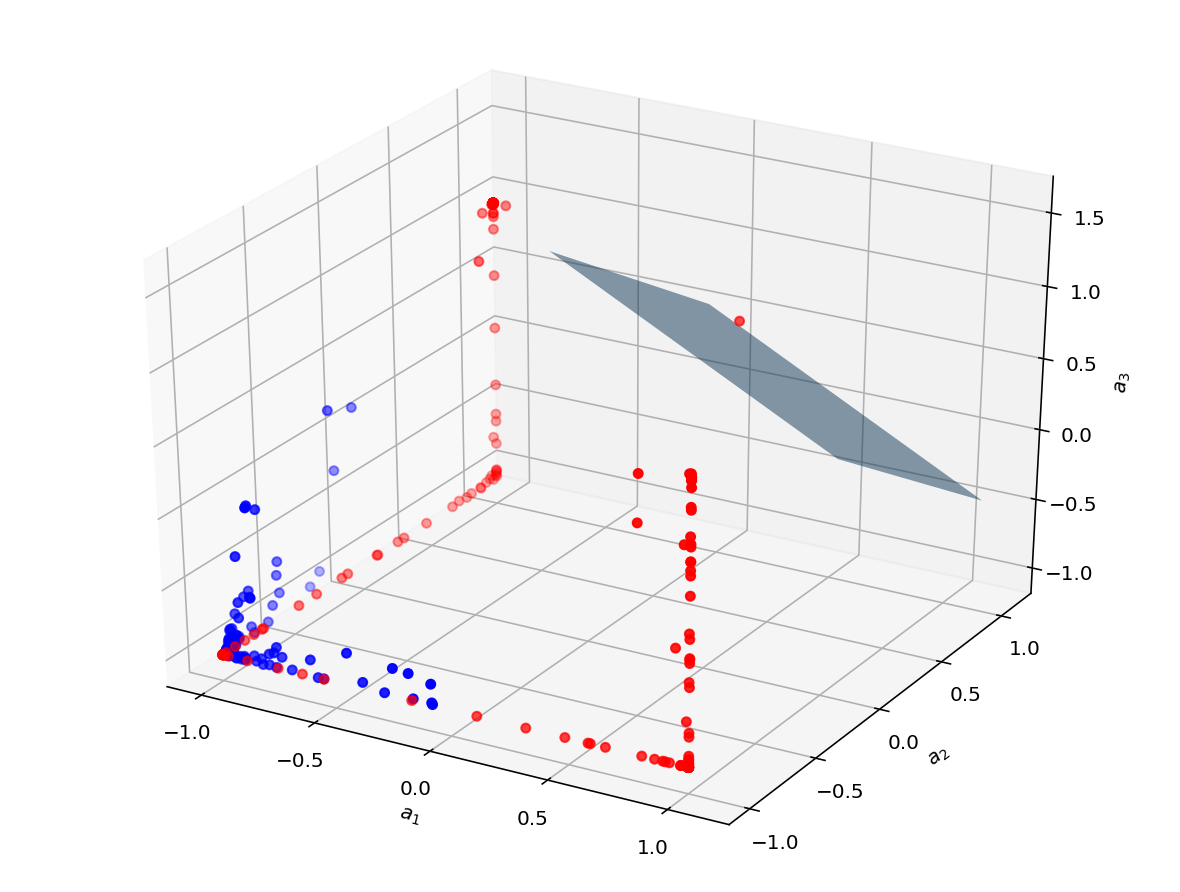

In [319]:
if hidden_units == 2:
    plot_boundaries_keras(new_space, y, sub_model_3.evaluate(new_space,y)[1], probability_func=sub_model_3.predict_proba, h=0.2)
else:
    # %matplotlib widget
    N=2
    xi, yi = np.meshgrid(np.linspace(-0.1, 1.1, N), np.linspace(-0.1, 1.1, N))
    z = (- xi*weights_3[0][0, 0 ] - yi*weights_3[0][1, 0] - weights_3[1][0])/weights_3[0][2,0]
    z = z 
    fig = plt.figure(figsize=(8,6))
    ax = Axes3D(fig)
    ax.plot_surface(xi, yi, z, alpha= 0.5)
    ax.scatter(new_space[y==0,0], new_space[y==0,1], new_space[y==0,2], c='r')
    ax.scatter(new_space[y==1,0], new_space[y==1,1], new_space[y==1,2], c='b')
    # ax.view_init(elev=20., azim=60)
    ax.set_xlabel('$a_1$')
    ax.set_ylabel('$a_2$')
    ax.set_zlabel('$a_3$')
    plt.show()